# Regression Project

Logan Quandt

Topic: In the United States, it is known that the health care system has been straining for a long time due to exponentially rising health care costs and the complexity of insurance. To address some of these issues legislation has been introduced or passed such as the ACA which was intended to provide health insurance for more Americans, or the bill more recently introduced which will cap insulin prices to make health care more affordable. In the interest of bringing the United States health care costs per capita more in line with the rest of the developed world we must first understand the factors driving the increased claim costs. Understanding this information will be beneficial to government programs such as Medicare or Medicaid, health insurance providers and health service providers in bringing down medical costs through detection and prevention of those at risk for high claims. As someone who works in the health insurance industry, I have a vested interest in this business problem and know many companies attempt to do this now using machine learning to predict risk or claim amounts.

Project: The focus of my project will be to build a regression model that can accurately predict claims costs based off numerous individual factors. To this end I have chosen a dataset from Kaggle that examines numerous factors for individuals (age, sex, BMI, number of children, region, and medical costs). The dataset contains 7 columns and 1338 records.  The dataset can be found at https://www.kaggle.com/datasets/teertha/ushealthinsurancedataset

In [230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [231]:
#load in csv file
health_df = pd.read_csv('insurance.csv')
health_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [232]:
#use describe to get some key statistics
health_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


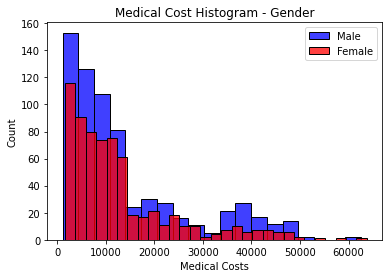

In [233]:
#plot histogram for male medical costs - UPDATED since MILESTONE 3 to gain better insights for EDA
fig = plt.figure
sns.histplot(data = health_df[health_df['sex'] == 'male'], x='charges', label='Male', color='blue')
sns.histplot(data = health_df[health_df['sex'] == 'female'], x='charges', label='Female', color = 'red')
plt.title("Medical Cost Histogram - Gender")
plt.xlabel('Medical Costs')
plt.ylabel('Count')
plt.legend()
plt.show()

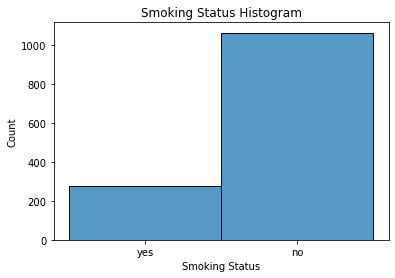

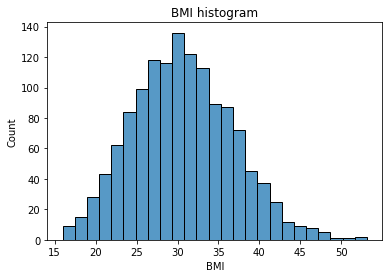

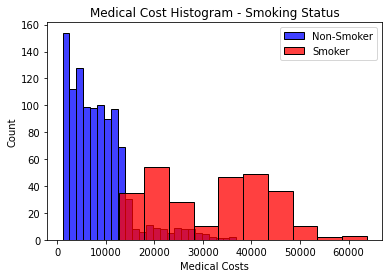

In [234]:
#plot histogram for smoking status
sns.histplot(health_df.smoker, bins='auto')
plt.title('Smoking Status Histogram')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.show()

#plot histogram for BMI
sns.histplot(x= health_df.bmi, bins = 'auto')
plt.title('BMI histogram')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

#plot histogram of costs by smoking - UPDATED SINCE MILESTONE 3 to gain better EDA insights
sns.histplot(data = health_df[health_df['smoker'] == 'no'], x='charges', label='Non-Smoker', color='blue')
sns.histplot(data = health_df[health_df['smoker'] == 'yes'], x='charges', label='Smoker', color = 'red')
plt.title("Medical Cost Histogram - Smoking Status")
plt.xlabel('Medical Costs')
plt.ylabel('Count')
plt.legend()
plt.show()

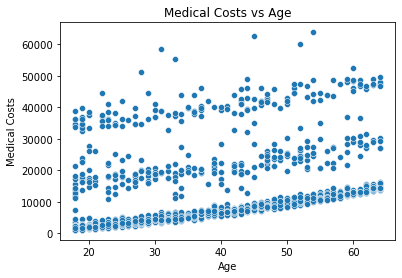

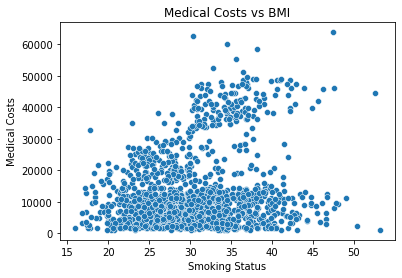

In [235]:
#plot scatterplot for age vs medical costs
sns.scatterplot(x=health_df.age, y=health_df.charges)
plt.title("Medical Costs vs Age")
plt.xlabel('Age')
plt.ylabel('Medical Costs')
plt.show()

#plot scatterplot for smoking status vs medical costs - UPDATED since Milestone 3 from smoking status to BMI as smoking status was moved to a histplot
sns.scatterplot(x=health_df.bmi, y=health_df.charges)
plt.title('Medical Costs vs BMI')
plt.xlabel('Smoking Status')
plt.ylabel('Medical Costs')
plt.show()

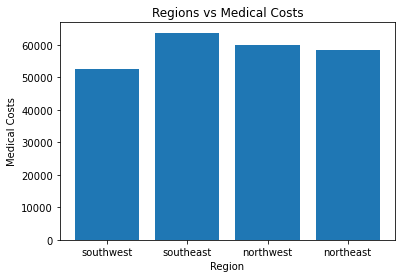

In [236]:
#plot bar chart for charges by region
plt.bar(health_df['region'], health_df['charges'])
plt.title('Regions vs Medical Costs')
plt.xlabel('Region')
plt.ylabel('Medical Costs')
plt.show()

## Overview/Conclusion

Visualization 1: This histogram on medical costs shows that most claims are positively skewed. There are a few outliers at the high end of the claim costs over $60000

Visualization 2: This visualization shows that most people (1000) are non-smokers and around 300 are smokers. 

Visualization 3: This graph shows that BMI is approximately normally distributed but tends to be high from a health status as over 25 is considered overweight. 

Visualization 4: This scatterplot shows that claim costs tend to rise as people age. There are also a few outliers that may need to be addressed.

Visualization 5: This scatterplot shows that smokers tend to have higher medical costs than non-smokers.

Visualization 6: This bar graph shows the breakdown of regions which have the highest claim costs. The southwest has the lowest claims and the southeast has the highest claims. 


In [237]:
#checking for missing values
health_df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [238]:
#check for duplicates
health_df.duplicated().sort_values(ascending=False)

581      True
0       False
889     False
897     False
896     False
        ...  
445     False
444     False
443     False
442     False
1337    False
Length: 1338, dtype: bool

In [239]:
#drop the duplicate values
health_df.drop_duplicates(inplace=True)
health_df.shape

(1337, 7)

There was no missing values to deal with, though I did remove one duplicate value from the data.

My dataset has categorical columns for sex, smoker and region which will need to be converted into dummy variables.

In [240]:
#check dtype of columns
health_df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [241]:
#convert sex, smoker and region categorical string values into numeric
cat_col = health_df.select_dtypes(include = 'object').columns
health_df = pd.get_dummies(health_df , cat_col)
health_df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [242]:
#check to ensure categorical columns were converted
health_df.dtypes

age                   int64
bmi                 float64
children              int64
charges             float64
sex_female            uint8
sex_male              uint8
smoker_no             uint8
smoker_yes            uint8
region_northeast      uint8
region_northwest      uint8
region_southeast      uint8
region_southwest      uint8
dtype: object

The graphical analysis above showed some outliers in the BMI column. I will explore these outliers and determine whether to remove them

In [243]:
#view all entries with bmi > 50
health_df[health_df['bmi'] > 50]

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
847,23,50.38,1,2438.0552,0,1,1,0,0,0,1,0
1047,22,52.58,1,44501.3982,0,1,0,1,0,0,1,0
1317,18,53.13,0,1163.4627,0,1,1,0,0,0,1,0


C:\Users\logan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

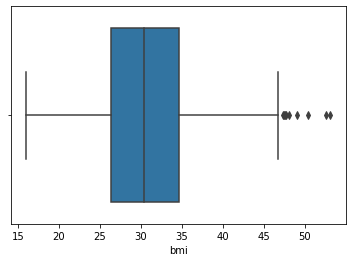

In [244]:
#boxplot to visualize outliers in BMI
sns.boxplot(health_df['bmi'])

In [245]:
#view DF shape for comparison after filtering
health_df.shape

(1337, 12)

In [246]:
#create new dataframe filtering out outliers
health_df = health_df[health_df['bmi'] < 50]

In [247]:
#confirm rows were removed
health_df.shape

(1334, 12)

Feature Engineering is a important step in a linear model and one possible way to find new features to use is to use bivariate combinations to increase your model's performance. 

In [248]:
#import needed libraries for bivarate combinations and split data using train_test_split
from itertools import combinations
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = health_df.drop(['charges'], axis=1)
y = health_df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2 , random_state=True)

In [249]:
#find all possible interactions between columns
column_list = X_train.columns
interactions = list(combinations(column_list, 2))
interactions

[('age', 'bmi'),
 ('age', 'children'),
 ('age', 'sex_female'),
 ('age', 'sex_male'),
 ('age', 'smoker_no'),
 ('age', 'smoker_yes'),
 ('age', 'region_northeast'),
 ('age', 'region_northwest'),
 ('age', 'region_southeast'),
 ('age', 'region_southwest'),
 ('bmi', 'children'),
 ('bmi', 'sex_female'),
 ('bmi', 'sex_male'),
 ('bmi', 'smoker_no'),
 ('bmi', 'smoker_yes'),
 ('bmi', 'region_northeast'),
 ('bmi', 'region_northwest'),
 ('bmi', 'region_southeast'),
 ('bmi', 'region_southwest'),
 ('children', 'sex_female'),
 ('children', 'sex_male'),
 ('children', 'smoker_no'),
 ('children', 'smoker_yes'),
 ('children', 'region_northeast'),
 ('children', 'region_northwest'),
 ('children', 'region_southeast'),
 ('children', 'region_southwest'),
 ('sex_female', 'sex_male'),
 ('sex_female', 'smoker_no'),
 ('sex_female', 'smoker_yes'),
 ('sex_female', 'region_northeast'),
 ('sex_female', 'region_northwest'),
 ('sex_female', 'region_southeast'),
 ('sex_female', 'region_southwest'),
 ('sex_male', 'smoker_

In [250]:
#find top 5 interactions between variables.
interaction_dict = {}
for interaction in interactions:
    X_train_int = X_train.copy()
    X_train_int['int'] = X_train_int[interaction[0]] * X_train_int[interaction[1]]
    lr3 = LinearRegression()
    lr3.fit(X_train_int, y_train)
    interaction_dict[lr3.score(X_train_int, y_train)] = interaction
    
top_5 = sorted(interaction_dict.keys(), reverse = True)[:5]
for interaction in top_5:
    print(interaction_dict[interaction])

('bmi', 'smoker_yes')
('smoker_yes', 'region_northwest')
('smoker_no', 'region_northwest')
('smoker_yes', 'region_southeast')
('smoker_yes', 'region_northeast')


In [251]:
#create model to check R2 before new features are added
LR = LinearRegression()
LR.fit(X_train, y_train)
y_hat_train = LR.predict(X_train)
r2_score(y_train, y_hat_train)

0.7525902842072163

In [252]:
#create 2 new features based off top two interactions and two things commonly known to increase medical costs
X_train_int['age_smoker_yes'] = X_train['age'] * X_train['smoker_yes']
X_train_int['bmi_smoker_yes'] = X_train['bmi'] * X_train['smoker_yes']

In [253]:
#create model to check R2 after new features were added to ensure they are useful
LR2 = LinearRegression()
LR2.fit(X_train_int, y_train)
LR2.score(X_train_int, y_train)

0.8426315841692361

In [254]:
#add new features to dataframe
health_df['age_smoker_yes'] = health_df['age'] * health_df['smoker_yes']
health_df['bmi_smoker_yes'] = health_df['bmi'] * health_df['smoker_yes']
health_df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,age_smoker_yes,bmi_smoker_yes
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1,19,27.9
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0,0,0.0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0,0,0.0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0,0,0.0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0,0,0.0


In [255]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [256]:
#look at dataframe to ensure data is cleaned and prepared
health_df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,age_smoker_yes,bmi_smoker_yes
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1,19,27.9
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0,0,0.0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0,0,0.0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0,0,0.0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0,0,0.0


In [257]:
#set up new train-test-split using 80/20 split
X_two = health_df.drop(['charges'], axis=1)
y_two = health_df['charges']

X_train_two, X_test_two, y_train_two, y_test_two = train_test_split(X_two, y_two, test_size = 0.2, random_state = True)

In [258]:
#setup Linear Regression model, fit the model and make prediction on test set
LR_final = LinearRegression()
LR_final.fit(X_train_two, y_train_two)
y_predict_final = LR_final.predict(X_test_two)

In [259]:
#print out evaluation metrics for LR model which had bivariate combinatios
print('R2:', r2_score(y_test_two, y_predict_final))
print('MAE:', mean_absolute_error(y_test_two, y_predict_final))
print('MSE:', mean_squared_error(y_test_two, y_predict_final))
print('RMSE:', np.sqrt(mean_squared_error(y_test_two, y_predict_final)))

R2: 0.8303255923405547
MAE: 2780.7117072984993
MSE: 21720015.964034297
RMSE: 4660.473791797815


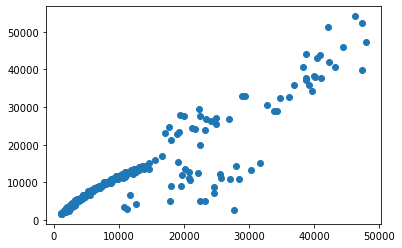

In [260]:
#visualize predictions for LR model with feature engineering
plt.scatter(y_test_two, y_predict_final)

In [261]:
#create LinearRegression model using original training and tests sets before feature engineering for comparison
LR_compare = LinearRegression()
LR_compare.fit(X_train, y_train)
y_pred_compare = LR_compare.predict(X_test)

In [262]:
#print out evaluation metrics for LR model before feature engineering
print('R2:', r2_score(y_test, y_pred_compare))
print('MAE:', mean_absolute_error(y_test, y_pred_compare))
print('MSE:', mean_squared_error(y_test, y_pred_compare))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_compare)))

R2: 0.7366890788745424
MAE: 4043.462638126369
MSE: 33706423.31534402
RMSE: 5805.7233240436135


In [263]:
#setup Random Forest Regressor, fit the model, and make predictions
RFR = RandomForestRegressor(random_state = 0, n_jobs = -1)
RFR.fit(X_train_two, y_train_two)
y_predict_RFR = RFR.predict(X_test_two)

In [264]:
#calculate evaluation metrics for Random Forest
print('R2:', r2_score(y_test_two, y_predict_RFR))
print('MAE:', mean_absolute_error(y_test_two, y_predict_RFR))
print('MSE:', mean_squared_error(y_test_two, y_predict_RFR))
print('RMSE:', np.sqrt(mean_squared_error(y_test_two, y_predict_RFR)))

R2: 0.8187229850081481
MAE: 2724.6582244089254
MSE: 23205265.38945207
RMSE: 4817.1843839998555


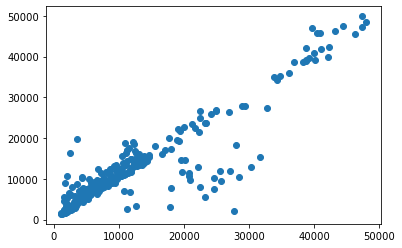

In [265]:
#visualize the predictions for Random Forest Model
plt.scatter(y_test_two, y_predict_RFR)

In [266]:
#create DecisionTreeRegressor model, fit the model and predict
DTR = DecisionTreeRegressor(random_state = 0)
DTR.fit(X_train_two, y_train_two)
y_predict_DTR = DTR.predict(X_test_two)

In [267]:
#calculate evaluation metrics for Decision Tree
print('R2:', r2_score(y_test_two, y_predict_DTR))
print('MAE:', mean_absolute_error(y_test_two, y_predict_DTR))
print('MSE:', mean_squared_error(y_test_two, y_predict_DTR))
print('RMSE:', np.sqrt(mean_squared_error(y_test_two, y_predict_DTR)))

R2: 0.7263780522428659
MAE: 2683.264291947565
MSE: 35026337.533020854
RMSE: 5918.305292313066


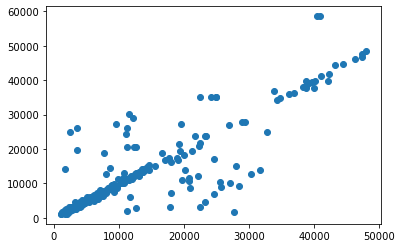

In [268]:
#visualize the predictions for Decision Tree Model
plt.scatter(y_test_two, y_predict_DTR)

# Conclusion

To ensure we get the model with the best performance, three different regression models were tested including Linear Regression, Decision Tree Regression, and Random Forest Regression. Each model was trained on the training sets and predictions were made on the test sets. 

As the data appeared to be linear based off the scatter plots used in our EDA a Multiple Linear Regression model seemed an obvious choice for this data. Linear Regression can also be a good baseline to compare to other models as it is simple to use and easy to implement.

A decision tree regressor was used as they consider all possible decisions. They are also a good choice for both continuous and categorical data.

A Random Forest Regressor was tested as it uses the ensemble method bagging to improve the model performance, it works well with no hyperparameter tuning and is better than linear models in most cases.

Based on our metrics we can see that the Linear Regression model has the best fit after feature engineering. The RMSE score is the smallest at 4660 indicating it has the lowest average distance between predicted values and the actual values. The MSE value is also the lowest. The Linear Regression model also has the highest R2 score at 0.83 indicating 83% of the variance in the respones variable can be explained the predictors. 


If we look at the comparison for the linear Regression model before feature engineering we would see that the Random Forest Regressor would have been superior as it is very close to the linear regression model after feature engineering with it's RMSE, R2 score, MSE and MAE.